# INGREDIENT EXTRACTION

## Dataset

It's from the Kaagle What's cooking competition.
<br>
Pandas was used to read the json file.

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_json('whats-cooking/train.json')

Sample of the data here :

In [3]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


## Cuisine List

The different types in the dataset have been listed.

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

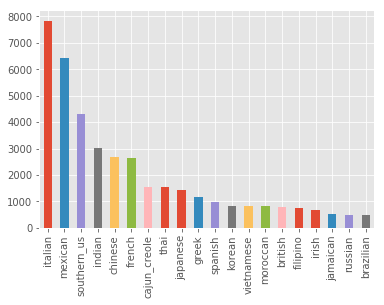

In [6]:
df_train['cuisine'].value_counts().plot(kind='bar')

## Popular Items in each Cuisine

This lists the popular ingredints for each cuisine.

In [7]:
from collections import Counter

In [8]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [9]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [10]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


For instance we can see that the top1 ingredient for each cuisine is a salty ingredient. This salty ingredient allows us to group the cuisines already:

salt is the standard for most cuisines
soy sauce is number one for chinese, japanese and korean cuisines
fish sauce is number one for thai and vietnamese cuisines
Another things that is easily seen from this table is that many ingredients have more than one name:

garlic cloves, garlic
olive oil, extra-virgin olive oil
...
Jugding from this table, it can be interesting to see which ingredients among the top10 ingredients are highly specific for a certain cuisine. A way to do this is to simply count the number of times an ingredient appears in a given cuisine and divide by the total number of recipes.

## Concatenation

Get all the ingredients as one column

In [11]:
import re
import base64
import pdb

In [13]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)

In [14]:
df_train.head()

,cuisine,id,ingredients,all_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


## Checking presence of ingredient in recipe

In [15]:
df_train['all_ingredients'].str.contains('garlic cloves')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12        True
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
39744     True
39745    False
39746    False
39747    False
39748    False
39749    False
39750    False
39751    False
39752    False
39753     True
39754     True
39755    False
39756    False
39757     True
39758    False
39759    False
39760    False
39761     True
39762    False
39763    False
39764    False
39765    False
39766    False
39767    False
39768    False
39769    False
39770    False
39771    False
39772    False
39773    False
Name: all_ingredients, Length: 39774, dtype: bool

## Group based on presence of ingredient

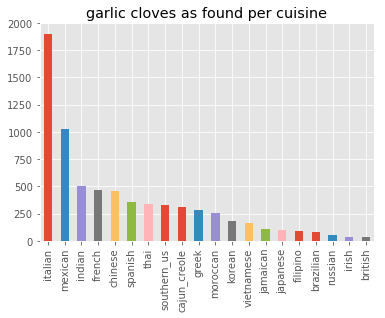

In [16]:
indices = df_train['all_ingredients'].str.contains('garlic cloves')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='garlic cloves as found per cuisine')

## Normalisation

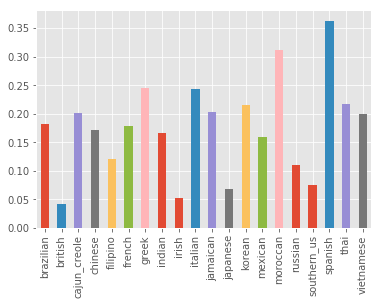

In [20]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_index(inplace=True)
relative_freq.plot(kind='bar')

## List of top 10 unique ingredients

In [21]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

## 8 by 8 subplot diagram

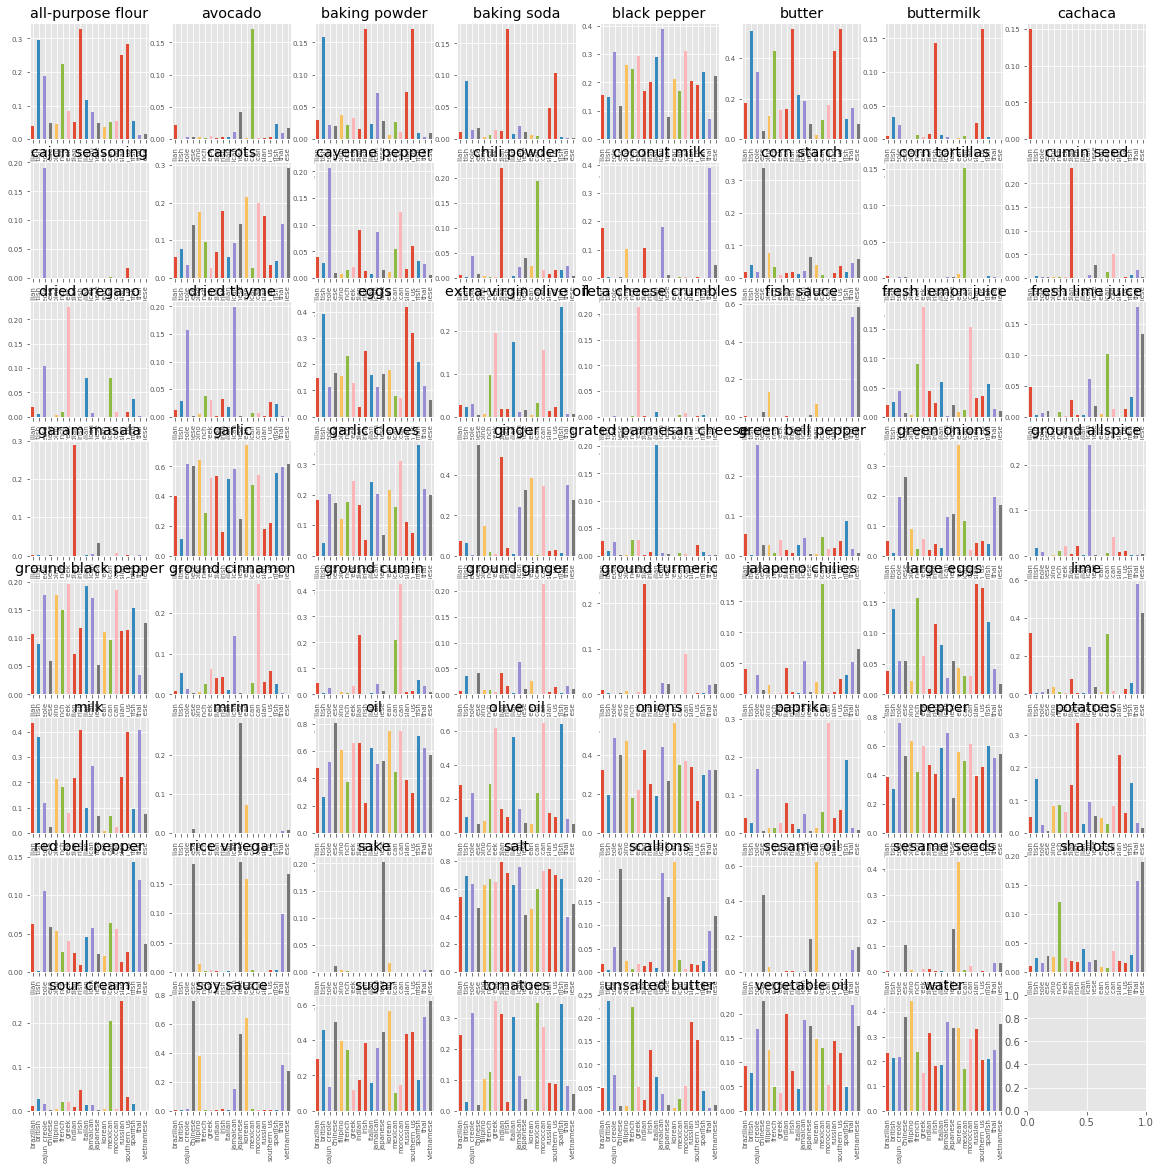

In [22]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

## Count Vectorizer to encode features for ML in scikit

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv = CountVectorizer()

In [25]:
X = cv.fit_transform(df_train['all_ingredients'].values)

In [26]:
X.shape

(39774, 3010)

We see that the vectorizer has retained 3010 ingredients and processed the 40 000 recipes in the training dataset. We can easily access the features to check them using the vectorizers properties.
<br>
Each feature gets assigned a column number, which is assigned a 1 or a 0 depending on the presence or not of the ingredient.

In [27]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

## Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)

In [30]:
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [31]:
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

## Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
logistic.score(X_test, y_test)

0.7850408548082967

## Confusion Matrix

Text(0.5, 64.59999999999997, 'Predicted label')

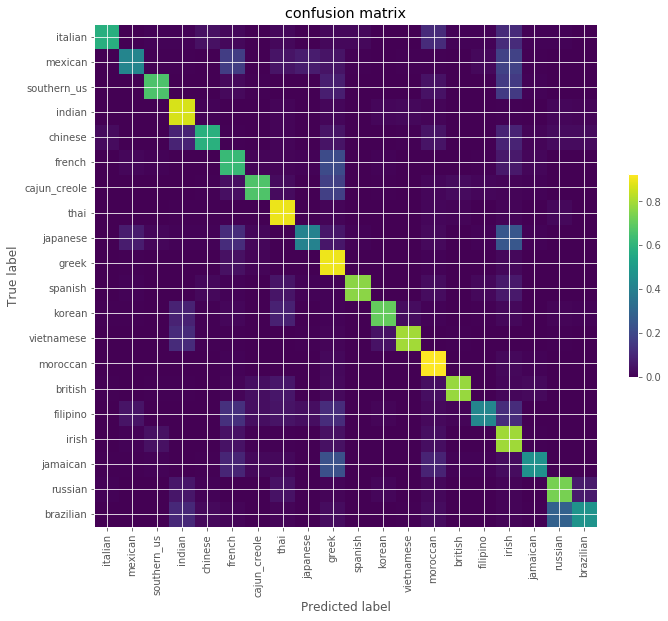

In [38]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Precision, recall, f1-score and support

In [39]:
from sklearn.metrics import classification_report

In [40]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.76      0.58      0.66        96
     mexican       0.63      0.42      0.50       159
 southern_us       0.80      0.67      0.73       329
      indian       0.81      0.87      0.84       525
     chinese       0.75      0.59      0.66       141
      french       0.60      0.63      0.62       531
cajun_creole       0.75      0.67      0.71       234
        thai       0.84      0.90      0.87       579
    japanese       0.64      0.41      0.50       127
       greek       0.80      0.90      0.85      1600
     spanish       0.85      0.77      0.80        94
      korean       0.84      0.71      0.77       257
  vietnamese       0.85      0.80      0.82       174
    moroccan       0.89      0.93      0.91      1305
     british       0.87      0.78      0.82       176
    filipino       0.62      0.42      0.50        85
       irish       0.71      0.79      0.75       853
    jamaican       0.70    

## Bokeh PLOTS

In [41]:
import pandas as pd

In [43]:
df = pd.read_json('whats-cooking/train.json')

In [44]:
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [45]:
from collections import Counter

def count_ingredients(df):
    """Counts ingredients in given df."""
    
    c = Counter()
    for recipe in df['ingredients']:
        for ingredient in recipe:
            c.update([ingredient])
    
    return c

In [46]:
count_ingredients(df.iloc[0:1])

Counter({'romaine lettuce': 1,
         'black olives': 1,
         'grape tomatoes': 1,
         'garlic': 1,
         'pepper': 1,
         'purple onion': 1,
         'seasoning': 1,
         'garbanzo beans': 1,
         'feta cheese crumbles': 1})

In [47]:
df.iloc[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [48]:
is_greek = df['cuisine'] == 'greek'
greek_counts = count_ingredients(df[is_greek])

In [49]:
[(key, greek_counts[key]) for key in greek_counts.keys()][:10]

[('romaine lettuce', 39),
 ('black olives', 31),
 ('grape tomatoes', 26),
 ('garlic', 216),
 ('pepper', 203),
 ('purple onion', 186),
 ('seasoning', 3),
 ('garbanzo beans', 23),
 ('feta cheese crumbles', 252),
 ('ground pork', 4)]

In [50]:
greek_counts.most_common(10)

[('salt', 572),
 ('olive oil', 504),
 ('dried oregano', 267),
 ('garlic cloves', 254),
 ('feta cheese crumbles', 252),
 ('extra-virgin olive oil', 229),
 ('fresh lemon juice', 222),
 ('ground black pepper', 221),
 ('garlic', 216),
 ('pepper', 203)]

In [51]:
non_greek_counts = count_ingredients(df[~is_greek])

In [55]:
from bokeh.plotting import output_notebook, figure, show
from bokeh.models import HoverTool, BoxSelectTool

output_notebook()

TOOLS = [BoxSelectTool(), HoverTool()]

p = figure(plot_width=600, plot_height=400, title='A test scatter plot with hover labels', tools=TOOLS)

p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=10)

show(p)

Loading BokehJS ...

In [56]:
from bokeh.plotting import ColumnDataSource
from bokeh.models import BoxZoomTool, ResetTool

def qqplot(x_list, y_list, specific_cuisine_name):
    """Makes a qqplot using the x_list for abscissa and y_list for ordinate ranks.
    Expects x_list and y_list to be sorted."""
    coords = []
    labels = []
    for y_index, y in enumerate(y_list):
        try:
            x_index = x_list.index(y)
        except ValueError:
            x_index = len(x_list)
        coords.append([x_index, y_index])
        labels.append(y)
    
    x_coords = [(len(x_list) - item[0]) / len(x_list) for item in coords]
    y_coords = [(len(y_list) - item[1]) / len(y_list) for item in coords]
    
    source = ColumnDataSource(
        data=dict(
            x=x_coords,
            y=y_coords,
            desc=labels,
        )
    )
    
    hover = HoverTool(
        tooltips="""
        

            

                @desc
                [$index]
            

            

                Location
                ($x, $y)
            

        

        """
    )
    
    TOOLS = [BoxZoomTool(), ResetTool(), hover]

    p = figure(plot_width=600, plot_height=400, title='QQ plot for {} cuisine'.format(specific_cuisine_name), tools=TOOLS)
    
    p.circle('x', 'y', size=5, source=source)
    p.line([0, 1], [0, 1], line_width=2)
    p.xaxis.axis_label = "rank in all other cuisines"
    p.yaxis.axis_label = "rank in {} cuisine".format(specific_cuisine_name)
    show(p)

In [57]:
sorted_greek_ingredients = [item[0] for item in greek_counts.most_common()]

In [58]:
sorted_non_greek_ingredients = [item[0] for item in non_greek_counts.most_common()]

In [59]:
qqplot(sorted_non_greek_ingredients, sorted_greek_ingredients, 'greek')

In [60]:
for cuisine in df.cuisine.unique():
    is_cuisine = df.cuisine == cuisine
    cuisine_counts = count_ingredients(df[is_cuisine])
    other_counts = count_ingredients(df[~is_cuisine])
    sorted_cuisine = [item[0] for item in cuisine_counts.most_common()]
    sorted_other = [item[0] for item in other_counts.most_common()]
    qqplot(sorted_other, sorted_cuisine, cuisine)

In [61]:
import pandas as pd

In [63]:
import codecs
df_train = pd.read_json(codecs.open('whats-cooking/train.json', 'r', 'utf-8'))

In [64]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [65]:
all_ingredients_text = []
for ingredient_list in df_train.ingredients:
    all_ingredients_text += [ing.lower() for ing in ingredient_list]

In [66]:
len(all_ingredients_text)

428275

In [67]:
len(set(all_ingredients_text))

6703

In [68]:
import re
re.split(re.compile('[,. ]+'), 'KRAFT Shredded Pepper Jack Cheese with a TOUCH OF PHILADELPHIA')

['KRAFT',
 'Shredded',
 'Pepper',
 'Jack',
 'Cheese',
 'with',
 'a',
 'TOUCH',
 'OF',
 'PHILADELPHIA']

In [69]:
splitter = re.compile('[,. ]+')
all_words = []
for ingredient in all_ingredients_text:
    all_words += re.split(splitter, ingredient)

In [70]:
len(all_words)

807802

In [71]:
len(set(all_words))

3152

In [72]:
sorted(set(all_ingredients_text), key=len, reverse=True)[:50]

['pillsbury™ crescent recipe creations® refrigerated seamless dough sheet',
 'kraft mexican style shredded four cheese with a touch of philadelphia',
 'bertolli vineyard premium collect marinara with burgundi wine sauc',
 'hidden valley® farmhouse originals italian with herbs dressing',
 'kraft shredded pepper jack cheese with a touch of philadelphia',
 'hidden valley® original ranch salad® dressing & seasoning mix',
 'condensed reduced fat reduced sodium cream of mushroom soup',
 'hellmannâ€™ or best food canola cholesterol free mayonnais',
 'condensed reduced fat reduced sodium cream of chicken soup',
 "i can't believ it' not butter! made with olive oil spread",
 '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
 'wish-bone light asian sesame ginger vinaigrette dressing',
 'kraft shredded low-moisture part-skim mozzarella cheese',
 'kraft mexican style 2% milk finely shredded four cheese',
 'hurst family harvest chipotle lime black bean soup mix',
 'reduced fat reduced sodi

In [73]:
import re

def to_ingredient(text):
    "Transforms text into an ingredient."
    return frozenset(re.split(re.compile('[,. ]+'), text))

In [74]:
all_ingredients = [to_ingredient(text) for text in all_ingredients_text]

In [75]:
all_ingredients[:10]

[frozenset({'lettuce', 'romaine'}),
 frozenset({'black', 'olives'}),
 frozenset({'grape', 'tomatoes'}),
 frozenset({'garlic'}),
 frozenset({'pepper'}),
 frozenset({'onion', 'purple'}),
 frozenset({'seasoning'}),
 frozenset({'beans', 'garbanzo'}),
 frozenset({'cheese', 'crumbles', 'feta'}),
 frozenset({'flour', 'plain'})]

In [76]:
import itertools

def candidates(ingredient):
    "Returns a list of candidate ingredients obtained from the original ingredient by keeping at least one of them."
    n = len(ingredient)
    possible = []
    for i in range(1, n + 1):
        possible += [frozenset(combi) for combi in itertools.combinations(ingredient, i)]
    return possible

In [77]:
candidates(to_ingredient("tomato and herb pasta sauce"))

[frozenset({'herb'}),
 frozenset({'tomato'}),
 frozenset({'and'}),
 frozenset({'pasta'}),
 frozenset({'sauce'}),
 frozenset({'herb', 'tomato'}),
 frozenset({'and', 'herb'}),
 frozenset({'herb', 'pasta'}),
 frozenset({'herb', 'sauce'}),
 frozenset({'and', 'tomato'}),
 frozenset({'pasta', 'tomato'}),
 frozenset({'sauce', 'tomato'}),
 frozenset({'and', 'pasta'}),
 frozenset({'and', 'sauce'}),
 frozenset({'pasta', 'sauce'}),
 frozenset({'and', 'herb', 'tomato'}),
 frozenset({'herb', 'pasta', 'tomato'}),
 frozenset({'herb', 'sauce', 'tomato'}),
 frozenset({'and', 'herb', 'pasta'}),
 frozenset({'and', 'herb', 'sauce'}),
 frozenset({'herb', 'pasta', 'sauce'}),
 frozenset({'and', 'pasta', 'tomato'}),
 frozenset({'and', 'sauce', 'tomato'}),
 frozenset({'pasta', 'sauce', 'tomato'}),
 frozenset({'and', 'pasta', 'sauce'}),
 frozenset({'and', 'herb', 'pasta', 'tomato'}),
 frozenset({'and', 'herb', 'sauce', 'tomato'}),
 frozenset({'herb', 'pasta', 'sauce', 'tomato'}),
 frozenset({'and', 'herb', 'pas

In [78]:
candidates(to_ingredient('knorr chicken flavor bouillon cube'))

[frozenset({'chicken'}),
 frozenset({'cube'}),
 frozenset({'flavor'}),
 frozenset({'knorr'}),
 frozenset({'bouillon'}),
 frozenset({'chicken', 'cube'}),
 frozenset({'chicken', 'flavor'}),
 frozenset({'chicken', 'knorr'}),
 frozenset({'bouillon', 'chicken'}),
 frozenset({'cube', 'flavor'}),
 frozenset({'cube', 'knorr'}),
 frozenset({'bouillon', 'cube'}),
 frozenset({'flavor', 'knorr'}),
 frozenset({'bouillon', 'flavor'}),
 frozenset({'bouillon', 'knorr'}),
 frozenset({'chicken', 'cube', 'flavor'}),
 frozenset({'chicken', 'cube', 'knorr'}),
 frozenset({'bouillon', 'chicken', 'cube'}),
 frozenset({'chicken', 'flavor', 'knorr'}),
 frozenset({'bouillon', 'chicken', 'flavor'}),
 frozenset({'bouillon', 'chicken', 'knorr'}),
 frozenset({'cube', 'flavor', 'knorr'}),
 frozenset({'bouillon', 'cube', 'flavor'}),
 frozenset({'bouillon', 'cube', 'knorr'}),
 frozenset({'bouillon', 'flavor', 'knorr'}),
 frozenset({'chicken', 'cube', 'flavor', 'knorr'}),
 frozenset({'bouillon', 'chicken', 'cube', 'flav

In [79]:
from collections import Counter

c = Counter(all_ingredients)

c.most_common(20)

[(frozenset({'salt'}), 18049),
 (frozenset({'onions'}), 7972),
 (frozenset({'oil', 'olive'}), 7972),
 (frozenset({'water'}), 7457),
 (frozenset({'garlic'}), 7380),
 (frozenset({'sugar'}), 6434),
 (frozenset({'cloves', 'garlic'}), 6237),
 (frozenset({'butter'}), 4848),
 (frozenset({'black', 'ground', 'pepper'}), 4785),
 (frozenset({'all-purpose', 'flour'}), 4632),
 (frozenset({'pepper'}), 4438),
 (frozenset({'oil', 'vegetable'}), 4385),
 (frozenset({'eggs'}), 3388),
 (frozenset({'sauce', 'soy'}), 3296),
 (frozenset({'kosher', 'salt'}), 3113),
 (frozenset({'green', 'onions'}), 3078),
 (frozenset({'tomatoes'}), 3058),
 (frozenset({'eggs', 'large'}), 2948),
 (frozenset({'carrots'}), 2814),
 (frozenset({'butter', 'unsalted'}), 2782)]

In [80]:
from collections import defaultdict
probability = defaultdict(lambda: 1, c.most_common())

In [81]:
probability[to_ingredient('pasta and herb')]

1

In [82]:
probability[to_ingredient('tomato sauce')]

867

In [83]:
def best_replacement(ingredient):
    "Computes best replacement ingredient for a given input."
    return max(candidates(ingredient), key=lambda c: probability[c])

In [84]:
best_replacement(to_ingredient("tomato sauce"))

frozenset({'sauce', 'tomato'})

In [85]:
best_replacement(to_ingredient("pasta and herb"))

frozenset({'pasta'})

In [86]:
best_replacement(to_ingredient("kraft mexican style shredded four cheese with a touch of philadelphia"))

frozenset({'cheese'})

In [87]:
pd.DataFrame([(text, 
               " ".join(best_replacement(to_ingredient(text)))) 
              for text in sorted(set(all_ingredients_text), key=len, reverse=True)[:50]],
            columns=['original ingredient', 'improved ingredient'])

,original ingredient,improved ingredient
0,pillsbury™ crescent recipe creations® refriger...,dough
1,kraft mexican style shredded four cheese with ...,cheese
2,bertolli vineyard premium collect marinara wit...,wine
3,hidden valley® farmhouse originals italian wit...,herbs
4,kraft shredded pepper jack cheese with a touch...,pepper
5,hidden valley® original ranch salad® dressing ...,seasoning
6,condensed reduced fat reduced sodium cream of ...,cream
7,hellmannâ€™ or best food canola cholesterol fr...,canola
8,condensed reduced fat reduced sodium cream of ...,chicken
9,i can't believ it' not butter! made with olive...,oil olive


In [88]:
def candidates_increasing_distance(ingredient, vocabulary):
    "Returns candidate ingredients obtained from the original ingredient by substraction, largest number of ingredients first."
    n = len(ingredient)
    for i in range(n - 1, 1, -1):
        possible = [frozenset(combi) for combi in itertools.combinations(ingredient, i) 
                    if frozenset(combi) in vocabulary]
        if len(possible) > 0:
            return possible
    return [ingredient]

In [89]:
vocabulary = dict(c.most_common())

In [90]:
list(vocabulary.keys())[:10]

[frozenset({'salt'}),
 frozenset({'onions'}),
 frozenset({'oil', 'olive'}),
 frozenset({'water'}),
 frozenset({'garlic'}),
 frozenset({'sugar'}),
 frozenset({'cloves', 'garlic'}),
 frozenset({'butter'}),
 frozenset({'black', 'ground', 'pepper'}),
 frozenset({'all-purpose', 'flour'})]

In [91]:
candidates_increasing_distance(to_ingredient("bottled clam juice"), vocabulary)

[frozenset({'clam', 'juice'})]

In [92]:
candidates_increasing_distance(to_ingredient('hidden valley original ranch spicy ranch dressing'), vocabulary)

[frozenset({'dressing', 'ranch'})]

In [93]:
candidates_increasing_distance(to_ingredient("skinless and boneless chicken breast fillet"), vocabulary)

[frozenset({'boneless', 'breast', 'chicken', 'skinless'})]

In [94]:
candidates_increasing_distance(to_ingredient("reduced sodium italian style stewed tomatoes"), vocabulary)

[frozenset({'italian', 'stewed', 'style', 'tomatoes'})]

In [95]:
def best_replacement_increasing_distance(ingredient, vocabulary):
    "Computes best replacement ingredient for a given input."
    return max(candidates_increasing_distance(ingredient, vocabulary), key=lambda w: vocabulary[w])

In [96]:
pd.DataFrame([(text, 
               " ".join(best_replacement_increasing_distance(to_ingredient(text), vocabulary))) 
              for text in sorted(set(all_ingredients_text), key=len, reverse=True)[:50]],
            columns=['original ingredient', 'improved ingredient'])

,original ingredient,improved ingredient
0,pillsbury™ crescent recipe creations® refriger...,seamless crescent refrigerated dough
1,kraft mexican style shredded four cheese with ...,shredded cheese
2,bertolli vineyard premium collect marinara wit...,marinara with vineyard premium burgundi collec...
3,hidden valley® farmhouse originals italian wit...,herbs italian
4,kraft shredded pepper jack cheese with a touch...,jack pepper shredded kraft cheese
5,hidden valley® original ranch salad® dressing ...,ranch dressing
6,condensed reduced fat reduced sodium cream of ...,cream mushroom sodium of reduced soup fat
7,hellmannâ€™ or best food canola cholesterol fr...,free food best mayonnais cholesterol or hellma...
8,condensed reduced fat reduced sodium cream of ...,condensed chicken cream sodium of reduced soup
9,i can't believ it' not butter! made with olive...,oil olive
